In [1]:
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from dataset import NCFDataset
from recom_ncf import NCFRecommender
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/review-clean.csv')[['user_idx', 'item_idx', 'rating_imp', 'timestamp', 'review']]
df.head()

,user_idx,item_idx,rating_imp,timestamp,review
0,0,0,1,1738278781,A legendary tactical shooter that shaped the g...
1,1,0,1,1736206418,"The best CS sure, but server browser is the il..."
2,2,0,1,1738041574,Some of the best memories of my childhood were...
3,3,0,1,1738015332,This game feels so much better than CS2. I kno...
4,4,0,1,1737853720,its very fun to play you can make friends out ...


## Mapping user id and app id to indices

## Splitting the data

In [3]:
df_train_eval, df_test = train_test_split(df[['user_idx', 'item_idx', 'rating_imp']], test_size=0.1, random_state=42)
df_train, df_eval = train_test_split(df_train_eval, test_size=(0.1/0.9), random_state=42)

train_dataset = NCFDataset(df_train)
eval_dataset = NCFDataset(df_eval)
test_dataset = NCFDataset(df_test)

train_dataloader = DataLoader(train_dataset, batch_size=4096, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=4096, shuffle=False)
test_dataloader = DataLoader(eval_dataset, batch_size=4096, shuffle=False)

unique_users = df["user_idx"].unique()
unique_items = df["item_idx"].unique()

In [4]:
print(df_train.shape)
print(df_eval.shape)
print(df_test.shape)

(1413153, 3)
(176645, 3)
(176645, 3)


## Train model

In [5]:
model = NCFRecommender(unique_users, unique_items)
model.fit(train_dataloader, eval_dataloader)

Epoch 1/20
-------------------------------
Train loss: 0.754045, Eval loss: 0.723106
Epoch 2/20
-------------------------------
Train loss: 0.695565, Eval loss: 0.670318
Epoch 3/20
-------------------------------
Train loss: 0.648302, Eval loss: 0.627207
Epoch 4/20
-------------------------------
Train loss: 0.609512, Eval loss: 0.591918
Epoch 5/20
-------------------------------
Train loss: 0.578149, Eval loss: 0.563165
Epoch 6/20
-------------------------------
Train loss: 0.552577, Eval loss: 0.540049
Epoch 7/20
-------------------------------
Train loss: 0.532362, Eval loss: 0.521747
Epoch 8/20
-------------------------------
Train loss: 0.516111, Eval loss: 0.507498
Epoch 9/20
-------------------------------
Train loss: 0.504299, Eval loss: 0.496671
Epoch 10/20
-------------------------------
Train loss: 0.495075, Eval loss: 0.488558
Epoch 11/20
-------------------------------
Train loss: 0.488120, Eval loss: 0.482552
Epoch 12/20
-------------------------------
Train loss: 0.48321

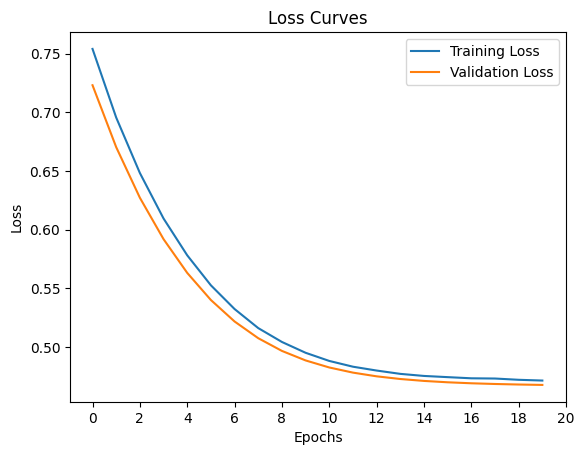

In [8]:
train_losses = model.train_losses
eval_losses = model.eval_losses
epochs = model.epochs

plt.plot(range(0, epochs), train_losses, label="Training Loss")
plt.plot(range(0, epochs), eval_losses, label="Validation Loss")
plt.xticks(ticks=np.arange(0, epochs + 1, 2))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend()
plt.show()

In [15]:
model.save('models/test-model.pt')

In [ ]:
from evaluation import Evaluation

evaluator = Evaluation(recommender=model, test_data=df_test, k=10)
evaluator.evaluate()